In [ ]:
# Begin by importing all necessary libraries
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import KFold
import sklearn.model_selection as model_selection
from sklearn.svm import SVC
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset

iris = sns.load_dataset('iris')
iris.head()

#data = pd.read_csv('iris.csv')

# It is a good idea to check and make sure the data is loaded as expected.

#print(data.head(5))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Pandas ".iloc" expects row_indexer, column_indexer
#The slicing notation above selects every row and every column except the last column (which is our label, the species).

X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# Alternate way of selecting columns:
#X = iris.iloc[:,:-1].values
#X = iris.drop('species', axis=1)  # Drops the 'species' column, leaving only features
# Now let's tell the dataframe which column we want for the target/labels.
y = iris['species']



Text(0.5, 0.98, 'Pair Plot of Iris Dataset')

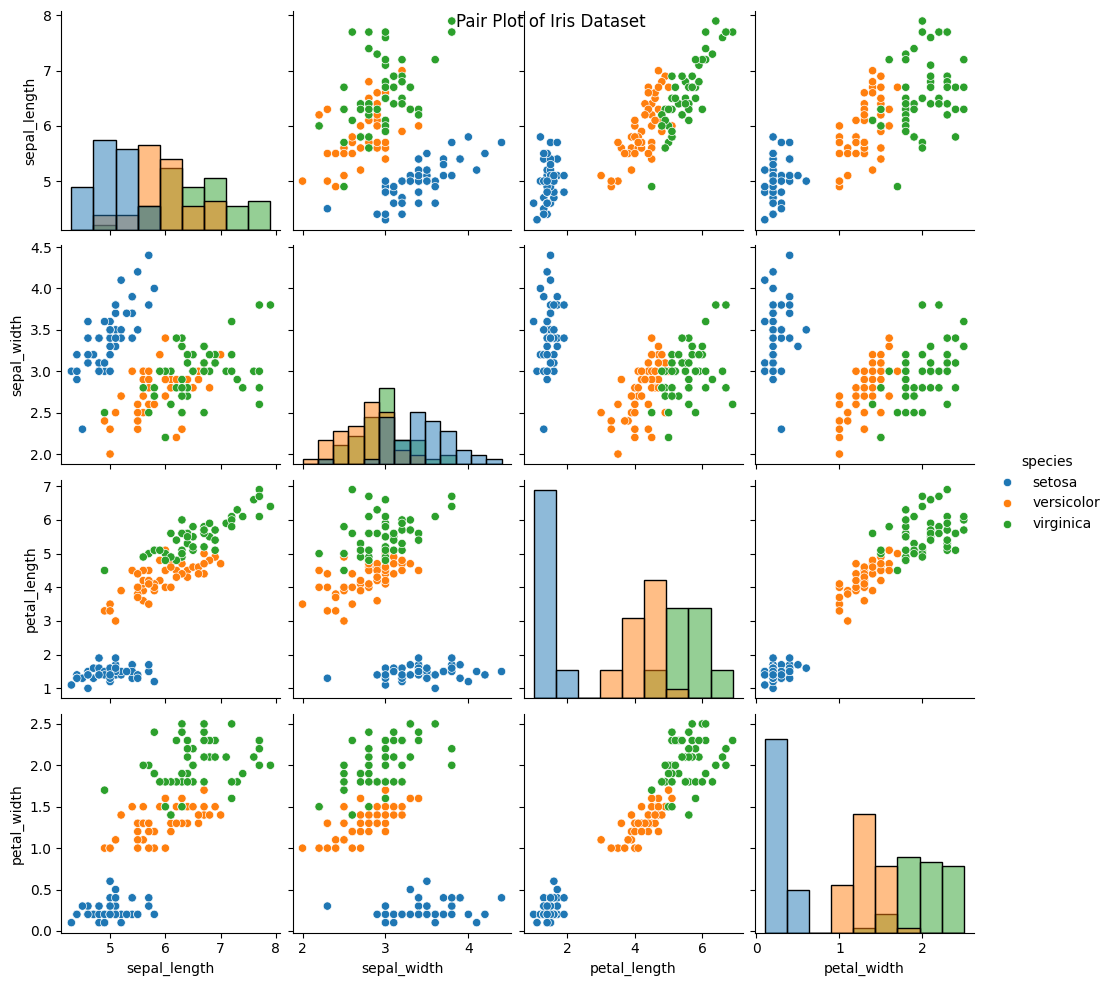

In [ ]:
#Pair plot to visualize all feature combinations
sns.pairplot(iris, hue="species", diag_kind="hist")
plt.suptitle("Pair Plot of Iris Dataset")

Text(0.5, 1.0, 'Petal Length vs. Petal Width')

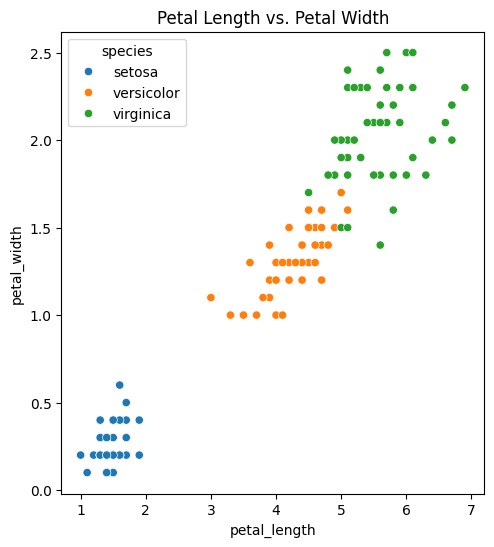

In [ ]:
# Specific scatter plots for selected features
plt.figure(figsize=(12, 6))

# Petal Length vs. Petal Width
plt.subplot(1, 2, 1)
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="species")
plt.title("Petal Length vs. Petal Width")

Text(0.5, 1.0, 'Sepal Length vs. Sepal Width')

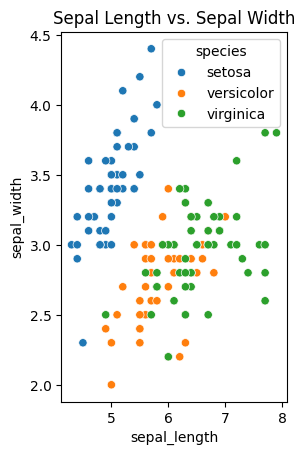

In [ ]:
# Sepal Length vs. Sepal Width
plt.subplot(1, 2, 2)
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species")
plt.title("Sepal Length vs. Sepal Width")

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size =0.75, test_size =0.25, random_state =27)



In [ ]:
print('Train:', X_train)
print('Test:', y_train)

Train:      sepal_length  sepal_width  petal_length  petal_width
82            5.8          2.7           3.9          1.2
30            4.8          3.1           1.6          0.2
6             4.6          3.4           1.4          0.3
103           6.3          2.9           5.6          1.8
70            5.9          3.2           4.8          1.8
..            ...          ...           ...          ...
37            4.9          3.6           1.4          0.1
56            6.3          3.3           4.7          1.6
31            5.4          3.4           1.5          0.4
72            6.3          2.5           4.9          1.5
19            5.1          3.8           1.5          0.3

[112 rows x 4 columns]
Test: 82     versicolor
30         setosa
6          setosa
103     virginica
70     versicolor
          ...    
37         setosa
56     versicolor
31         setosa
72     versicolor
19         setosa
Name: species, Length: 112, dtype: object


In [ ]:
#SVC_model = svm.SVC()
#SVC_model = svm.SVC_model()
#Support Vector Machines work by drawing a line between the different clusters of data points to group them into classes. Points on one side of the line will be one class and points on the other side belong to another class.
SVC_model = SVC(kernel='linear', C=1E10)
SVC_model.fit(X_train, y_train)
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)
#K-Nearest Neighbors operates by checking the distance from some test example to the known values of some training example. The group of data points/class that would give the smallest distance between the training points and the testing point is the class that is selected.



SVC_model = SVC(kernel='linear', C=1E10)

What it Does:

This code creates an instance of a Support Vector Classifier (SVC) from the scikit-learn library. The SVC is a powerful machine learning algorithm used for classification tasks (e.g., predicting whether an email is spam or not, classifying images, etc.).

Explanation of Parameters:

kernel='linear':

This specifies the type of kernel function to use in the SVM. The kernel function transforms the input data into a higher-dimensional space where it might be easier to linearly separate the classes.
'linear' is the simplest kernel, which assumes the data is linearly separable. It's often a good starting point and works well when the classes are well-separated by a straight line (or hyperplane in higher dimensions).
C=1E10:

This is the regularization parameter. It controls the trade-off between maximizing the margin (the separation between classes) and minimizing classification errors.
A large value of C (like 1E10, which is 10 to the power of 10) means you're willing to tolerate very few misclassifications on the training data. This leads to a "hard margin" SVM, where the decision boundary tries to perfectly separate the classes.
Conversely, a smaller C would allow for more misclassifications, leading to a "soft margin" SVM, which might generalize better to new data.

In [ ]:
#Now let's fit the classifiers.. train
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
#The call has trained the model, so now we can predict and store the prediction in a variable:
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

In [ ]:
#print(accuracy_score(KNN_prediction, y_test))

# Accuracy score is the simplest way to evaluate
print(accuracy_score(SVC_prediction, y_test))
print(accuracy_score(KNN_prediction, y_test))
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(SVC_prediction, y_test))

cm = confusion_matrix(SVC_prediction, y_test)
# Create confusion matrix
class_names = iris['species'].unique()
# Create a Pandas DataFrame for better formatting and labeling
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Print the confusion matrix with labels
print("Confusion Matrix:")
print(cm_df)
print(classification_report(SVC_prediction, y_test))
print(classification_report(KNN_prediction, y_test))

#confusion matrix : This can be a bit hard to interpret, but the number of correct predictions for each class run on the diagonal from top-left to bottom-right



0.9210526315789473
0.9473684210526315
[[ 9  0  0]
 [ 0 13  2]
 [ 0  1 13]]
Confusion Matrix:
            setosa  versicolor  virginica
setosa           9           0          0
versicolor       0          13          2
virginica        0           1         13
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.93      0.87      0.90        15
   virginica       0.87      0.93      0.90        14

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.88      0.93        16
   virginica       0.87      1.00      0.93        13

    accuracy                           0.95        38
   macro avg       0.96      0.96      0.95        38
weighted avg       0.95      0.9

	        Predicted Setosa	Predicted Versicolor	Predicted Virginica
Actl Setosa	  True Positive	   False Negative	        False Negative
Actl Versicolor	False Positive	True Positive	        False Negative
Actl Virginica	False Positive	False Negative	      True Positive

Accuracy: Accuracy is a common evaluation metric used in classification tasks. It measures the proportion of correctly classified instances out of the total number of instances. In the code snippet, metrics.accuracy_score(y_test, y_pred) computes the accuracy score by comparing the predicted values (y_pred) with the true values (y_test). It gives you an overall measure of how well your model is predicting the "chocolate" variable. A higher accuracy score indicates better performance, where 1.0 represents perfect accuracy.

Precision: Precision is a metric that assesses the proportion of true positive predictions (correctly predicted positive instances) out of the total instances predicted as positive. It provides an indication of how reliable the positive predictions are. The formula for precision is (true positives) / (true positives + false positives). In the code snippet, metrics.precision_score(y_test, y_pred) calculates the precision score by comparing the predicted values (y_pred) with the true values (y_test). A higher precision score signifies a lower number of false positives.

Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions (correctly predicted positive instances) out of the total actual positive instances. It captures the ability of the model to identify positive instances. The formula for recall is (true positives) / (true positives + false negatives). In the code snippet, metrics.recall_score(y_test, y_pred) calculates the recall score by comparing the predicted values (y_pred) with the true values (y_test). A higher recall score indicates a lower number of false negatives.



By using these evaluation metrics, you can gain insights into different aspects of your classification model's performance, such as overall accuracy, the reliability of positive predictions (precision), and the ability to correctly identify positive instances (recall). It's important to consider both precision and recall together, as they provide a more comprehensive understanding of the model's performance.

Scenario:

Imagine you have a dataset with two features (X1 and X2) and a binary target variable (Y). You want to build a classifier to predict whether a new data point belongs to class 0 or class 1.

Visualizing the Data:

The first step is to create a scatter plot of your data, with X1 on one axis, X2 on the other, and different colors or symbols representing the two classes. This plot will give you a visual intuition about the nature of your data.

Case 1: Linearly Separable Data

If your plot shows that the two classes can be easily separated by a straight line (or a hyperplane in higher dimensions), then SVM is often a good choice. SVM excels at finding optimal boundaries that maximize the margin between classes.


Case 2: Non-Linearly Separable Data with Clear Clusters

If your plot reveals that the data points are not linearly separable but form distinct clusters, KNN could be a better fit. KNN works by finding the nearest neighbors of a new data point and making predictions based on the majority class of those neighbors.

Case 3: Complex Decision Boundaries

If the decision boundary between classes is complex or irregular, both KNN and SVM (with a non-linear kernel) can be considered. Experiment with both and evaluate their performance using techniques like cross-validation.


Size of Dataset: KNN can be computationally expensive for large datasets as it needs to calculate distances to all training points. SVM might be a better choice in this case.
Number of Features: If you have a high number of features, SVM can be more efficient, especially with linear kernels. KNN might struggle with the curse of dimensionality.
Interpretability: If you need to interpret the decision-making process of your model, KNN might be easier to understand as it relies on simple distance calculations.